In [1]:
import os
import sys
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import tensorflow as tf
from tensorflow.keras.utils import HDF5Matrix
import warnings
warnings.filterwarnings("ignore")

sys.path.insert(0, "../covidxai/model")
from unet import Unet

/Users/samsonqian/anaconda3/lib/python3.6/site-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
WEIGHTS_PATH = "../models/weights/unet_weights.hdf5"
IMG_PATH = "../data/images.hdf5"
LABEL_PATH = "../data/labels.hdf5"

In [29]:
unet = Unet(verbose=True).model
unet.load_weights(WEIGHTS_PATH)

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
t (InputLayer)                  [(None, 512, 512, 1) 0                                            
__________________________________________________________________________________________________
conv2d_24 (Conv2D)              (None, 512, 512, 64) 640         t[0][0]                          
__________________________________________________________________________________________________
conv2d_25 (Conv2D)              (None, 512, 512, 64) 36928       conv2d_24[0][0]                  
__________________________________________________________________________________________________
max_pooling2d_4 (MaxPooling2D)  (None, 256, 256, 64) 0           conv2d_25[0][0]                  
____________________________________________________________________________________________

In [4]:
images = np.array(HDF5Matrix(IMG_PATH, 'validation')) # input val image
labels = np.array(HDF5Matrix(LABEL_PATH, 'validation')) # val label

In [18]:
def show_scan(idx):
    plt.figure(figsize=(8, 8))
    plt.subplot(1, 2, 1)
    plt.imshow(images[idx].reshape(512, 512).astype("float"))
    plt.title("Scan")
    plt.subplot(1, 2, 2)
    plt.imshow(labels[idx].reshape(512, 512).astype("float"))
    plt.title("Mask")

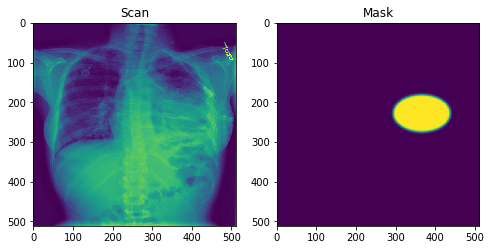

In [19]:
show_scan(0)

In [33]:
def display_prediction(idx, model=unet):
    plt.figure(figsize=(10, 10))
    plt.subplot(1, 3, 1)
    plt.imshow(images[idx].reshape(512, 512).astype("float"))
    plt.title("Scan")
    plt.subplot(1, 3, 2)
    plt.imshow(labels[idx].reshape(512, 512).astype("float"))
    plt.title("Mask")
    plt.subplot(1, 3, 3)
    plt.imshow((model.predict(images[idx:idx+1]))[0].reshape(512, 512).astype("float"))
    plt.title("Prediction")

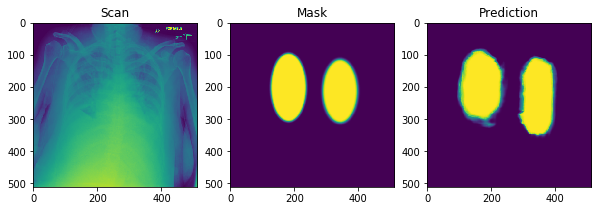

In [35]:
display_prediction(10)